In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
# Ajouter le répertoire parent au path pour accéder à config
sys.path.append('..')

# Importer les configurations
from config.parameters import DATA_CONFIG

full_path = os.path.join('..', DATA_CONFIG['raw_data_path'], DATA_CONFIG['train_file'])

df = pd.read_csv(full_path)
pd.set_option('display.max_columns', None)


In [16]:
df.head()
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PolicyId           22481 non-null  object 
 1   AgeConducteur      22481 non-null  float64
 2   SexeConducteur     22481 non-null  object 
 3   StatutMatrimonial  7372 non-null   object 
 4   BonusMalus         22481 non-null  float64
 5   FrequencePaiement  22481 non-null  object 
 6   CodeProfession     7372 non-null   object 
 7   AgeVehicule        22481 non-null  float64
 8   ClasseVehicule     22481 non-null  object 
 9   PuissanceVehicule  22481 non-null  object 
 10  CarburantVehicule  22481 non-null  object 
 11  UsageVehicule      22481 non-null  object 
 12  Garage             22481 non-null  object 
 13  Region             22481 non-null  object 
 14  PrimeCommerciale   22481 non-null  float64
dtypes: float64(4), object(11)
memory usage: 2.6+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PolicyId,22481,22481,90144365.100b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeConducteur,22481.0,NaN,NaN,NaN,39.719185,11.854692,18.0,31.0,37.0,47.0,87.0
SexeConducteur,22481,2,M,14809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatutMatrimonial,7372,5,Cohabiting,4630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BonusMalus,22481.0,NaN,NaN,NaN,63.242471,15.381818,50.0,50.0,57.0,72.0,156.0
FrequencePaiement,22481,4,Half-yearly,12486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CodeProfession,7372,7,Private employee,3992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeVehicule,22481.0,NaN,NaN,NaN,7.505805,4.848366,0.0,4.0,7.0,10.0,89.0
ClasseVehicule,22481,9,Cheapest,7839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PuissanceVehicule,22481,15,P10,4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(num_cols)
print(cat_cols)

# Exclure PolicyID
cat_cols = [col for col in cat_cols if col != 'PolicyId']
print(cat_cols)


['AgeConducteur', 'BonusMalus', 'AgeVehicule', 'PrimeCommerciale']
['PolicyId', 'SexeConducteur', 'StatutMatrimonial', 'FrequencePaiement', 'CodeProfession', 'ClasseVehicule', 'PuissanceVehicule', 'CarburantVehicule', 'UsageVehicule', 'Garage', 'Region']
['SexeConducteur', 'StatutMatrimonial', 'FrequencePaiement', 'CodeProfession', 'ClasseVehicule', 'PuissanceVehicule', 'CarburantVehicule', 'UsageVehicule', 'Garage', 'Region']


AgeConducteur {'count': 22481.0, 'mean': 39.719185089631246, 'std': 11.854692254386523, 'min': 18.0, '25%': 31.0, '50%': 37.0, '75%': 47.0, 'max': 87.0, 'IQR': 16.0, 'skew': 0.8164159429225293, 'kurtosis': 0.35712346231230807}


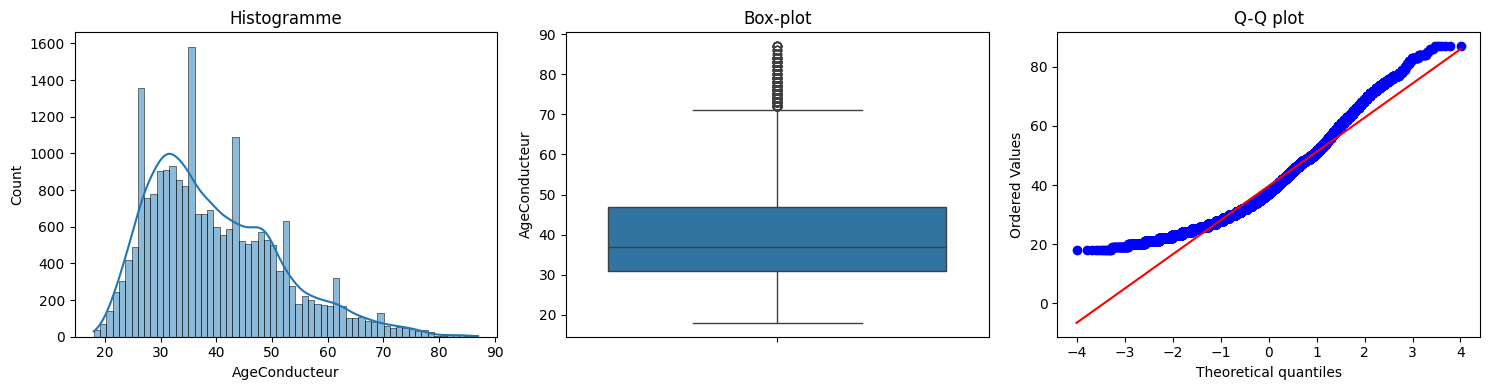

BonusMalus {'count': 22481.0, 'mean': 63.24247142031049, 'std': 15.381817974871977, 'min': 50.0, '25%': 50.0, '50%': 56.99999999999999, '75%': 72.0, 'max': 156.0, 'IQR': 22.0, 'skew': 1.1057539046178004, 'kurtosis': 0.6109108973911379}


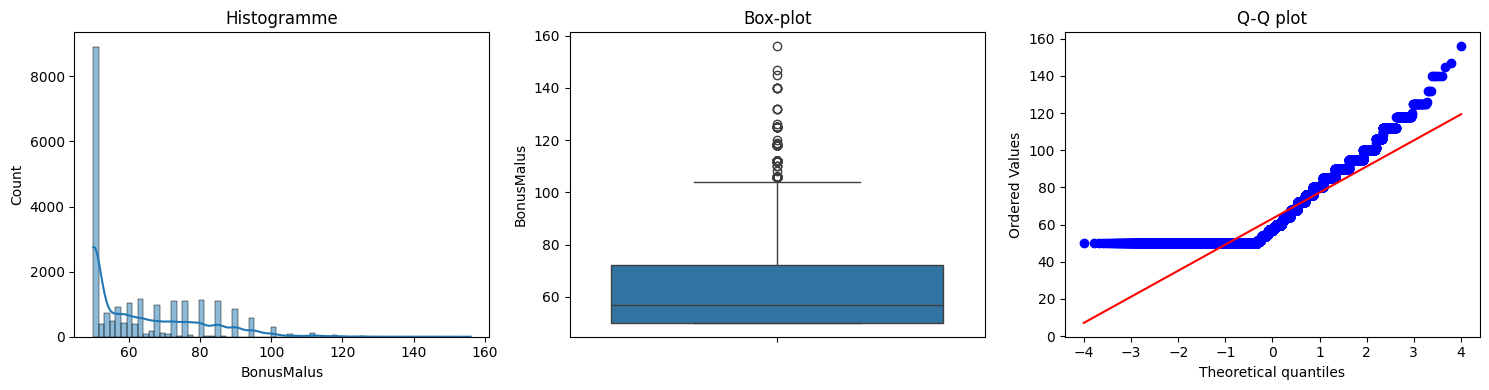

AgeVehicule {'count': 22481.0, 'mean': 7.505804901917174, 'std': 4.84836570614016, 'min': 0.0, '25%': 4.0, '50%': 7.0, '75%': 10.0, 'max': 89.0, 'IQR': 6.0, 'skew': 1.6761157859341604, 'kurtosis': 14.637934556728915}


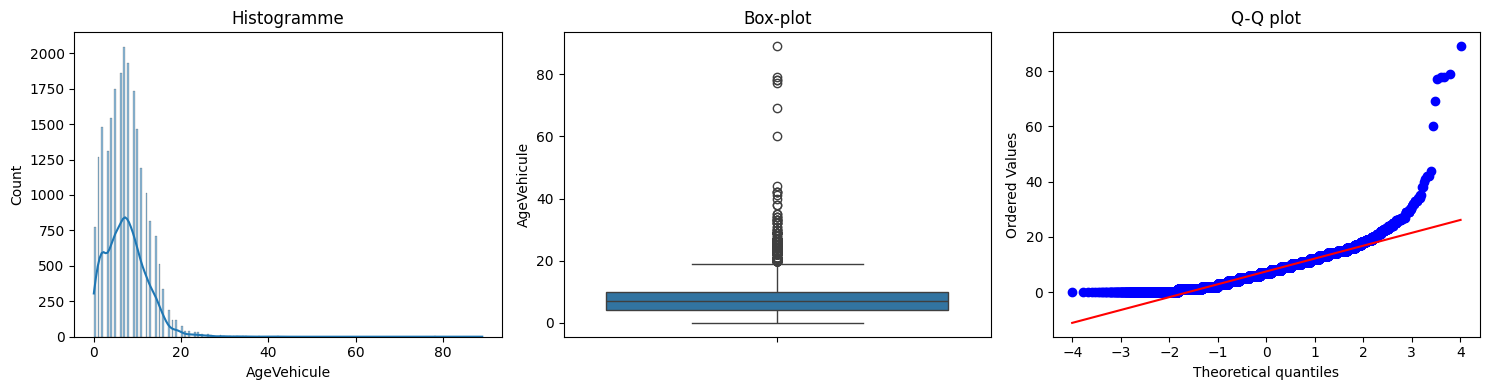

PrimeCommerciale {'count': 22481.0, 'mean': 420.7860771318002, 'std': 219.26108035138583, 'min': 91.0, '25%': 264.8, '50%': 375.1, '75%': 521.3, 'max': 2902.3, 'IQR': 256.49999999999994, 'skew': 1.6760645138930867, 'kurtosis': 5.358751316413817}


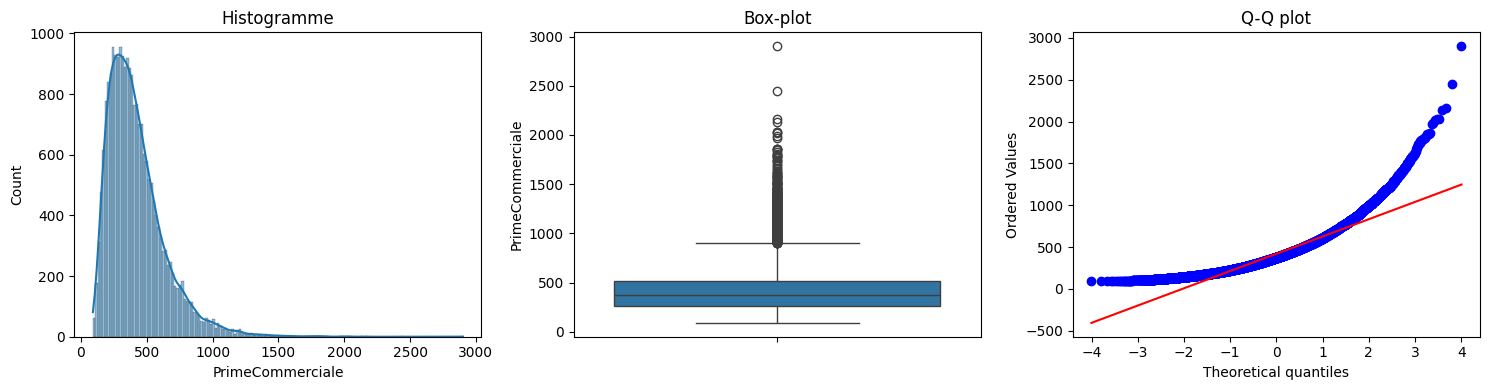

In [18]:
for col in num_cols:

    stats = df[col].describe().to_dict()
    stats.update({'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
                'skew': df[col].skew(), 'kurtosis': df[col].kurtosis()})
    print(col, stats)

    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    sns.histplot(df[col], kde=True, ax=axes[0]).set_title('Histogramme')
    sns.boxplot(y=df[col], ax=axes[1]).set_title('Box-plot')
    from scipy.stats import probplot
    probplot(df[col].dropna(), dist="norm", plot=axes[2])
    axes[2].set_title('Q-Q plot')
    plt.tight_layout()
    plt.show()


                count  proportion
SexeConducteur                   
M               14809    0.658734
F                7672    0.341266


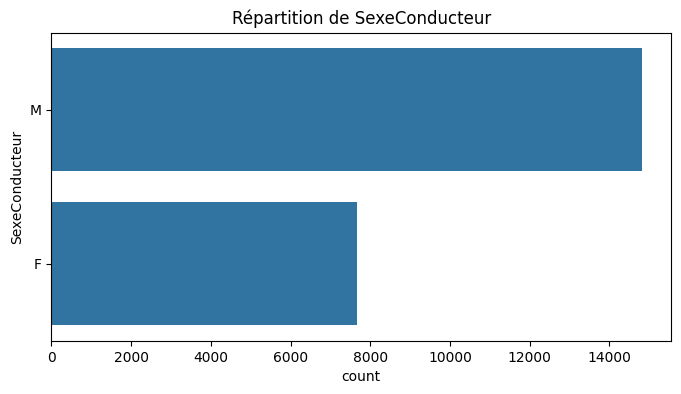

                   count  proportion
StatutMatrimonial                   
NaN                15109    0.672079
Cohabiting          4630    0.205952
Married             1568    0.069748
Single               865    0.038477
Widowed              221    0.009831
Divorced              88    0.003914


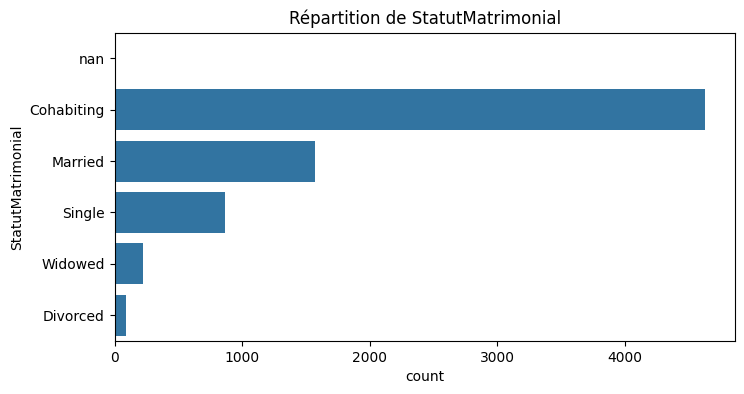

                   count  proportion
FrequencePaiement                   
Half-yearly        12486    0.555402
Annual              7680    0.341622
Quarterly           1709    0.076020
Monthly              606    0.026956


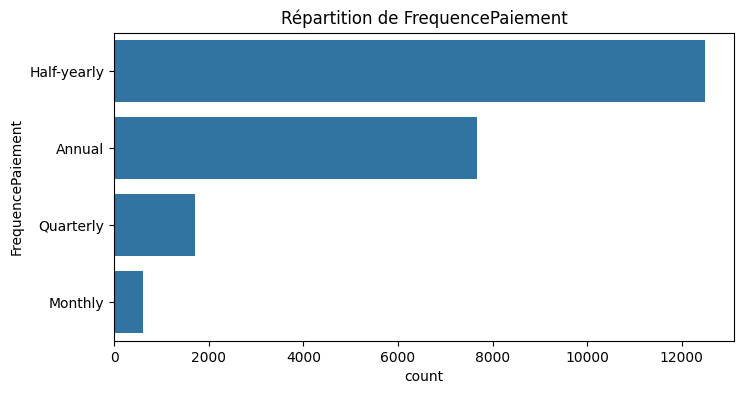

                  count  proportion
CodeProfession                     
NaN               15109    0.672079
Private employee   3992    0.177572
Public employee    2170    0.096526
Retiree             444    0.019750
Other               378    0.016814
Craftsman           267    0.011877
Farmer              108    0.004804
Retailer             13    0.000578


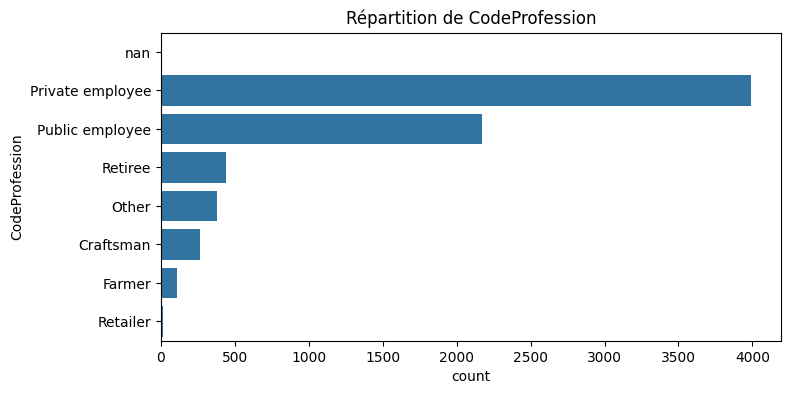

                count  proportion
ClasseVehicule                   
Cheapest         7839    0.348694
Cheaper          6514    0.289756
Cheap            3893    0.173168
Medium low       2419    0.107602
Medium            847    0.037676
Medium high       592    0.026333
Expensive         246    0.010943
More expensive     94    0.004181
Most expensive     37    0.001646


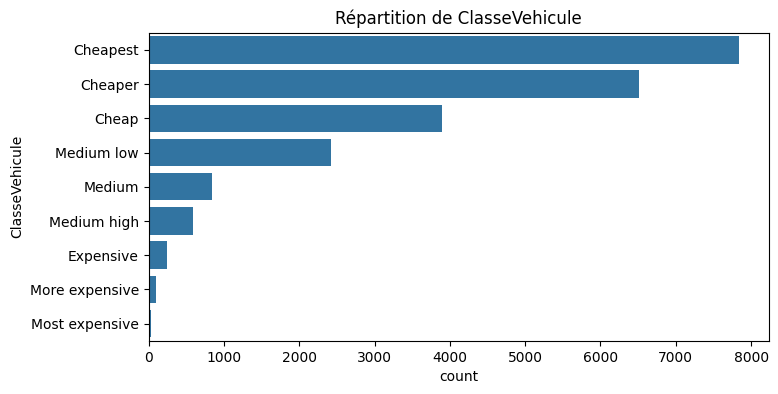

                   count  proportion
PuissanceVehicule                   
P10                 4018    0.178729
P12                 3619    0.160980
P11                 3588    0.159601
P9                  2914    0.129621
P13                 2828    0.125795
P8                  2220    0.098750
P14                 1637    0.072817
P15                  635    0.028246
P7                   413    0.018371
P16                  302    0.013434
P5                   252    0.011209
P17                   23    0.001023
P4                    21    0.000934
P2                     9    0.000400
P6                     2    0.000089


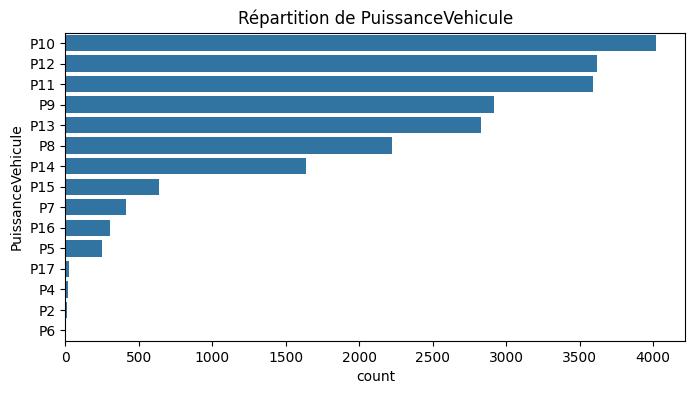

                   count  proportion
CarburantVehicule                   
Regular            13600    0.604955
Diesel              8881    0.395045


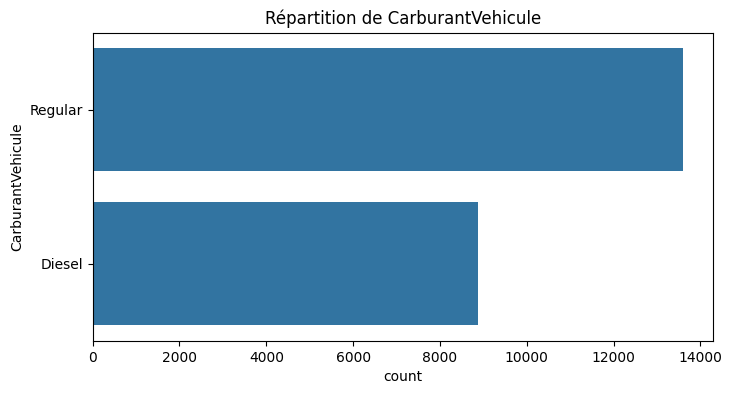

                        count  proportion
UsageVehicule                            
Private+trip to office  21830    0.971042
Professional              471    0.020951
Professional run          180    0.008007


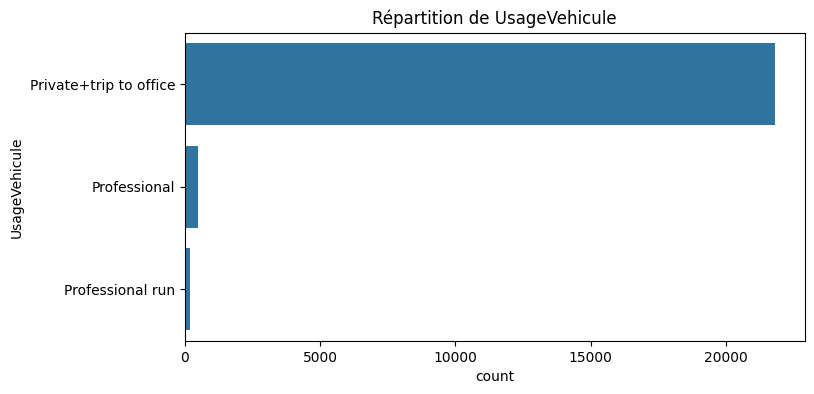

                           count  proportion
Garage                                      
Closed zbox                11311    0.503136
Closed collective parking   4233    0.188292
Opened collective parking   3770    0.167697
Street                      3167    0.140875


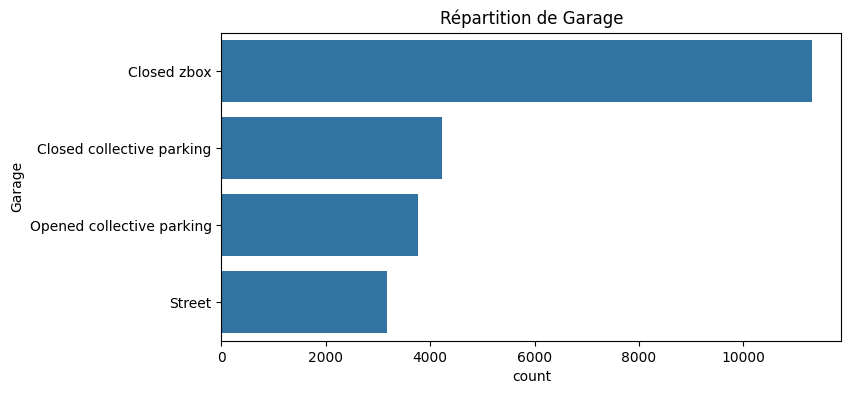

              count  proportion
Region                         
Center        11946    0.531382
Headquarters   4229    0.188114
Paris area     3371    0.149949
South West     2935    0.130555


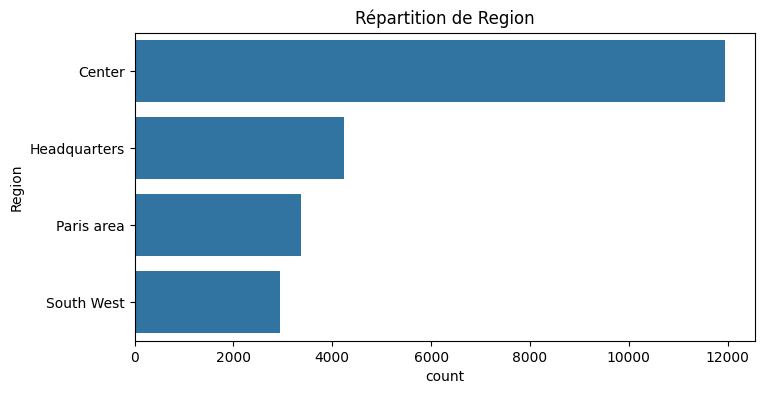

In [19]:

for col in cat_cols :
    
    freq = df[col].value_counts(dropna=False)
    prop = df[col].value_counts(normalize=True, dropna=False)
    print(pd.concat([freq, prop], axis=1, keys=['count','proportion']))



    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=freq.index)
    plt.title(f'Répartition de {col}')
    plt.show()

In [20]:
# Parcourir toutes les colonnes du DataFrame
for col in df.columns:

    # Traitement des valeurs manquantes
    miss = df[col].isna().mean() * 100
    print(f"{col}: {miss:.2f}% manquantes")

    # Vérifier si la colonne est de type numérique
    if pd.api.types.is_numeric_dtype(df[col]):
        # Calculer Q1 et Q3
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        # Calculer l'IQR
        IQR = Q3 - Q1
        # Définir le masque pour détecter les outliers
        mask = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
        # Afficher le nombre d'outliers et leur pourcentage
        print(f"{col}: {mask.sum()} outliers ({mask.mean() * 100:.2f}%)")



PolicyId: 0.00% manquantes
AgeConducteur: 0.00% manquantes
AgeConducteur: 329 outliers (1.46%)
SexeConducteur: 0.00% manquantes
StatutMatrimonial: 67.21% manquantes
BonusMalus: 0.00% manquantes
BonusMalus: 312 outliers (1.39%)
FrequencePaiement: 0.00% manquantes
CodeProfession: 67.21% manquantes
AgeVehicule: 0.00% manquantes
AgeVehicule: 327 outliers (1.45%)
ClasseVehicule: 0.00% manquantes
PuissanceVehicule: 0.00% manquantes
CarburantVehicule: 0.00% manquantes
UsageVehicule: 0.00% manquantes
Garage: 0.00% manquantes
Region: 0.00% manquantes
PrimeCommerciale: 0.00% manquantes
PrimeCommerciale: 775 outliers (3.45%)
